In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Giả sử bạn có 3 ảnh đặt tên:
image_files = ['thuyen.jpg', 'chua.jpg', 'duahau.jpg']

def load_image(index):
    return cv2.imread(image_files[index])


In [2]:
def translate(img, tx, ty):
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

def rotate(img, angle, reshape=False):
    h, w = img.shape[:2]
    M = cv2.getRotationMatrix2D((w/2, h/2), angle, 1.0)
    if reshape:
        return cv2.warpAffine(img, M, (int(1.5*w), int(1.5*h)))
    else:
        return cv2.warpAffine(img, M, (w, h))

def zoom(img, factor):
    h, w = img.shape[:2]
    return cv2.resize(img, (int(w * factor), int(h * factor)))

def blur(img, sigma):
    k = int(2 * round(3 * sigma) + 1)
    return cv2.GaussianBlur(img, (k, k), sigma)

def wave_transform(img, amplitude=20):
    h, w = img.shape[:2]
    map_x = np.tile(np.arange(w), (h, 1)).astype(np.float32)
    map_y = np.array([[i + amplitude * np.sin(i / 20.0)] * w for i in range(h)], dtype=np.float32)
    return cv2.remap(img, map_x, map_y, interpolation=cv2.INTER_LINEAR)


In [7]:
print("Chọn ảnh: 0 (image1), 1 (image2), 2 (image3)")
img_idx = int(input())
img = load_image(img_idx)
if img is None:
    raise ValueError("Không tìm thấy ảnh! Kiểm tra lại đường dẫn hoặc tên ảnh.")


print("Chọn phép biến đổi:")
print("1. Tịnh tiến")
print("2. Xoay")
print("3. Zoom")
print("4. Gaussian Blur")
print("5. Sóng (Warping)")

choice = int(input("Lựa chọn: "))

if choice == 1:
    tx = int(input("Dịch theo X (px): "))
    ty = int(input("Dịch theo Y (px): "))
    result = translate(img, tx, ty)

elif choice == 2:
    angle = float(input("Góc xoay (độ): "))
    reshape = input("Reshape (y/n): ").lower() == 'y'
    result = rotate(img, angle, reshape)

elif choice == 3:
    factor = float(input("Hệ số zoom (ví dụ: 0.5 hoặc 2): "))
    result = zoom(img, factor)

elif choice == 4:
    sigma = float(input("Sigma cho Gaussian Blur: "))
    result = blur(img, sigma)

elif choice == 5:
    amp = int(input("Biên độ sóng: "))
    result = wave_transform(img, amplitude=amp)

else:
    print("Lựa chọn không hợp lệ.")
    result = img


Chọn ảnh: 0 (image1), 1 (image2), 2 (image3)
Chọn phép biến đổi:
1. Tịnh tiến
2. Xoay
3. Zoom
4. Gaussian Blur
5. Sóng (Warping)


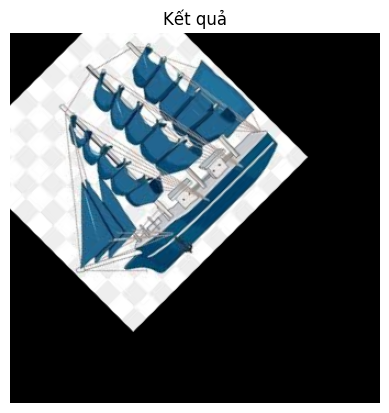

Ảnh đã lưu vào: output_result.jpg


In [8]:
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Kết quả")
plt.show()

cv2.imwrite("output_result.jpg", result)
print("Ảnh đã lưu vào: output_result.jpg")
